In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/data.csv")
data

,fpr,n,median,mean,bloomFilterSize
0,0.100,500,417,414,304
1,0.100,1000,545,536,600
2,0.100,5000,833,813,3000
3,0.100,10000,961,939,5992
4,0.010,500,729,731,600
5,0.010,1000,953,947,1200
6,0.010,5000,1433,1429,5992
7,0.010,10000,1657,1654,11984
8,0.001,500,1009,995,904
9,0.001,1000,1297,1301,1800


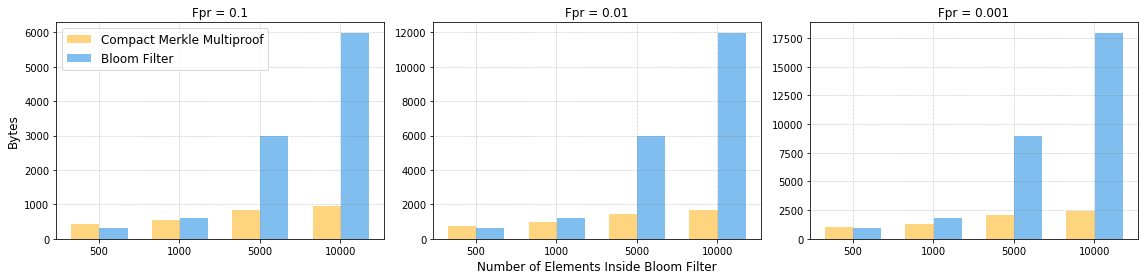

In [27]:
bar_width = 0.35
opacity = 0.5
n_groups = 4
index = np.arange(n_groups)
bar_widths = [0+bar_width,1+bar_width,2+bar_width,3+bar_width]
a = data.loc[data["fpr"] == 0.001]

fig = plt.figure(figsize=(16,4))
ax0 = fig.add_subplot(1, 3, 1, ylabel= "Bytes",xticklabels=a[data.columns[1]].tolist(), xticks= bar_widths, title="Fpr = 0.1")
ax1 = fig.add_subplot(1, 3, 2, xlabel = "Number of Elements Inside Bloom Filter",xticklabels=a[data.columns[1]].tolist(), xticks= bar_widths, title="Fpr = 0.01")
ax2 = fig.add_subplot(1, 3, 3, xticklabels=a[data.columns[1]].tolist(), xticks= bar_widths, title="Fpr = 0.001")

ax0.grid(color='gray', linestyle=':', linewidth=0.5)
ax1.grid(color='gray', linestyle=':', linewidth=0.5)
ax2.grid(color='gray', linestyle=':', linewidth=0.5)

bt_zero_one = data.loc[data["fpr"] == 0.1][data.columns[2]]
bf_zero_one = data.loc[data["fpr"] == 0.1][data.columns[4]]
rects1 = ax0.bar(index+0.18, bt_zero_one, bar_width, alpha=opacity, color='#FFAB00', label='Compact Merkle Multiproof')
rects2 = ax0.bar(index + 0.18 + bar_width, bf_zero_one, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter')

bt_zero_one = data.loc[data["fpr"] == 0.01][data.columns[2]]
bf_zero_one = data.loc[data["fpr"] == 0.01][data.columns[4]]
rects1 = ax1.bar(index+0.18, bt_zero_one, bar_width, alpha=opacity, color='#FFAB00', label='Compact Merkle Multiproof')
rects2 = ax1.bar(index + 0.18 + bar_width, bf_zero_one, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter')

bt_zero_one = data.loc[data["fpr"] == 0.001][data.columns[2]]
bf_zero_one = data.loc[data["fpr"] == 0.001][data.columns[4]]
rects1 = ax2.bar(index+0.18, bt_zero_one, bar_width, alpha=opacity, color='#FFAB00', label='Compact Merkle Multiproof')
rects2 = ax2.bar(index + 0.18 + bar_width, bf_zero_one, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter')

ax0.legend(fontsize=12)

plt.rc('axes', labelsize=12)


plt.tight_layout()
fig.savefig('results/results.pdf', format='pdf')
plt.show()